# **DIABETES DETECTION**

---



This notebook constructs a Multilayer Perceptron (MLP) model using Keras to predict the onset of diabetes within five years based on patient data.

First install tensorflow for avoiding some warnings with its currennt version

!pip install tensorflow==2.13.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#Data Loading and Inspection












In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# **Overview of the Dataset:**

**Features**

*   **Pregnancies:** Number of previous pregnancies

*   **Glucose:** Plasma glucose concentration

*   **BloodPressure:** Diastolic blood pressure

*   **SkinThickness:** Skin fold thickness measured from the triceps
*   Insulin : Blood serum insulin concentration

*   **BMI:** Body mass index

*   **DiabetesPedigreeFunction:** A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes

*   **Age:** Age in years

*   **Outcome:** The target variable to  be predicted, 1 for patients that developed diabetes within five years of the initial measurement, and 0 otherwise


In [4]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

First there are **768** rows of data, and the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns have a minimum value of 0. This doesn't quite make sense. The measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0. **This is an indication that there are missing values in the dataset.** The values were probably recorded as 0 due to certain issues during data collection. Perhaps the equipment was faulty, or the patient was unwilling to have their measurements taken.



In [5]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


It is important to note that the variables are on different scales. For example, the DiabetesPedigreeFunction variable ranges from 0 to ~2.5, while the Insulin variable ranges from 0 to ~800. This difference in scale can cause problems in training the neural network, as variables with larger scales tend to dominate variables with smaller scale.

# **Exploratory data analysis (EDA)**

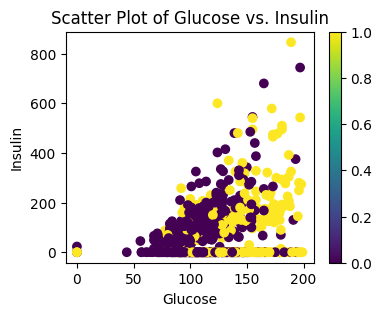

In [6]:
plt.figure(figsize=(4, 3))  # Set the figure size

# Scatter plot for 'Glucose' vs. 'Insulin'
plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'], cmap='viridis')

plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter Plot of Glucose vs. Insulin')
plt.colorbar()  # Show colorbar for Outcome

plt.show()



**Explanation of code**
1. `plt.figure(figsize=(4, 3))`:
Creates a new figure for the plot with a specified size of 4 inches by 3 inches.
2. `plt.scatter(df['Glucose'], df['Insulin'], c=df['Outcome'], cmap='viridis')`:
Creates the scatter plot.
`df['Glucose']`: Values from the "Glucose" column are used for the x-axis.
`df['Insulin']`: Values from the "Insulin" column are used for the y-axis.
`c=df['Outcome']`: Colors the points based on the values in the "Outcome" column (0 for no diabetes, 1 for diabetes).
cmap='viridis': Uses the "viridis" colormap for coloring the points.
3. plt.xlabel('Glucose'): Sets the label for the x-axis.

4. `plt.ylabel('Insulin')`: Sets the label for the y-axis.

5. `plt.title('Scatter Plot of Glucose vs. Insulin')`: Sets the title of the plot.

6. `plt.colorbar()`: Adds a colorbar to the plot to show the mapping between colors and the "Outcome" values.

7. `plt.show()`: Displays the plot.

#**Discussion of outcome**

From the above scatterplot is obvious that Non-diabetic individuals (purple points) tend to cluster towards the lower left of the plot, indicating lower glucose and insulin levels. There's a slight positive correlation, but it's not very strong.
On the other hand Diabetic individuals (yellow points) show a more dispersed pattern with higher glucose and insulin values overall.

There are distinct clusters, one with moderate insulin and high glucose and another with high insulin and high glucose.
These clusters suggest that there might be different subgroups within the diabetic population. For example, some individuals may have higher insulin resistance, leading to higher glucose levels even with elevated insulin.

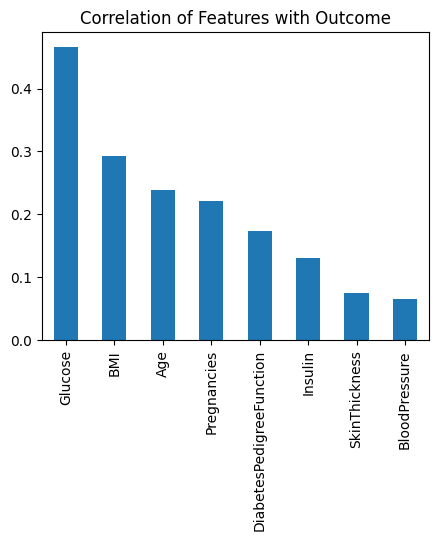

In [7]:
#CORELATION MATRIX
X = df.drop('Outcome', axis=1) # Features (excluding the target variable)
y = df['Outcome']  # Target variable

# Calculate the correlation matrix with Outcome
correlation_matrix = X.corrwith(y)

# Plot the correlation values
plt.figure(figsize=(5, 4))
correlation_matrix.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Outcome')
plt.show()

**Explanation of code**

1. `X = df.drop('Outcome', axis=1)`:
Creates a new DataFrame X by removing the "Outcome" column from the original DataFrame df. This is done because we want to analyze the correlation of the features (predictors) with the target variable.
axis=1 specifies that we're dropping a column.
2. `y = df['Outcome']`:
Creates a Series y containing only the "Outcome" column, representing the target variable.
3. `correlation_matrix = X.corrwith(y)`:
Calculates the correlation between each column in X (features) and the Series y (target variable).
The corrwith() method computes pairwise correlations between rows or columns of two DataFrames or a DataFrame and a Series.
4. `plt.figure(figsize=(10, 8))`:
Creates a new figure for the plot with a specified size of 10 inches by 8 inches.
correlation_matrix.sort_values
5. `(ascending=False).plot(kind='bar')`:
Sorts the correlation values in descending order (ascending=False).
Creates a bar plot to visualize the sorted correlation values.
6. `plt.title('Correlation of Features with Target')`:Sets the title of the plot.
7. `plt.show()`:Displays the plot.





#**Discussion of outcome**
The strongest positive correlation with the outcome has Glucose. This means that higher glucose levels are generally associated with a higher likelihood of diabetes. BMI shows a moderate positive correlation, suggesting that higher BMI values are also linked to increased diabetes risk. Age indicates that older individuals tend to have a slightly higher risk of diabetes and a higher number of pregnancies might be associated with a slightly increased risk.


On the other hand DiabetesPedigreeFunction has a very weak positive correlation, suggesting a minimal influence on diabetes risk. Also BloodPressure, SkinThickness, Insulin may not be strong predictors of diabetes in this dataset.


---

The choice between scatterplots and
histograms depends on what needs to be analyzed:

**Scatterplots:** Are great for visualizing the relationship between two features. They show how the values of one feature change in relation to another. Used scatterplots for identifying correlations, clusters, or patterns between features.

**Histograms:** Are ideal for visualizing the distribution of a single feature. They show the frequency or count of data points that fall within specific ranges (bins). Used for understanding the shape, center, and spread of a single variable.

In your case, since you're exploring the diabetes dataset, here's when each plot might be useful:


---

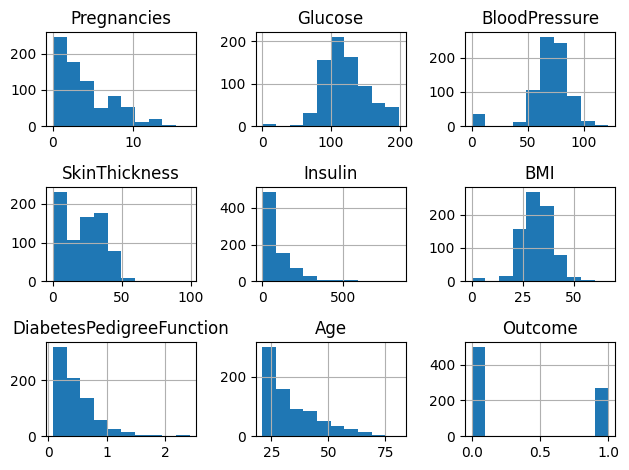

In [8]:
from matplotlib import pyplot as plt
df.hist()
plt.tight_layout()
plt.show()

**explanation of code**

df.hist()`: This line uses the pandas `hist()` function to create histograms for each column in the DataFrame `df`.

**A histogram is a graphical representation that organizes a group of data points into specified ranges. It shows the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.**

- `plt.show()`: This displays all the figures, in this case, the histograms. pyplot uses an idea of current figure and current axes for plotting, and all plotting commands apply to current figure or axes.

`plt.show()` is used when we want to display the plot. If it is not used, the plot will not be rendered.

#**Discussion of outcome**
The histogram provides some interesting insights into the data. From the histogram for **Age**, its obvious that most of the data was collected from young people, with the most common age group between 20-30 years old. We can also see that the distribution for **BMI, BloodPressure, and Glucose** concentration is normally distributed (that is, a bell curve shape), which is what is expected when such statistics are collected from a population.

However, note that the tail of the Glucose concentration distribution shows some rather extreme values. It appears that there are people with plasma Glucose concentration that is almost 200. On the opposite end of the distribution, we can see that there are people with 0 values for BMI, BloodPressure, and Glucose. Logically, we know that it is not possible to have a 0 value for these measurements. **Are these missing values?.** These missing values will create a big problem.

Moreover in the distribution of the **Pregnancies**, there are some outliers as well. Some patients had more than 15 previous pregnancies. While that may not be entirely surprising, such outliers should be kept in mind because they can skew the results.


The distribution of **outcome** shows that approximately 65% of the population belongs to class 0 (no diabetes), while the remaining 35% belongs to class 1 (diabetes).



---

When building a machine learning classifier, should always keep in mind the distribution of classes in the training data. In order to ensure that the machine learning classifier works well in the real world, it should be ensured that the distribution of classes in the training data mirrors that of the real world. In this case, the distribution of the classes does not match those in the real world, **as it is estimated by the World Health Organization (WHO) that only 8.5% of the world population suffers from diabetes.**



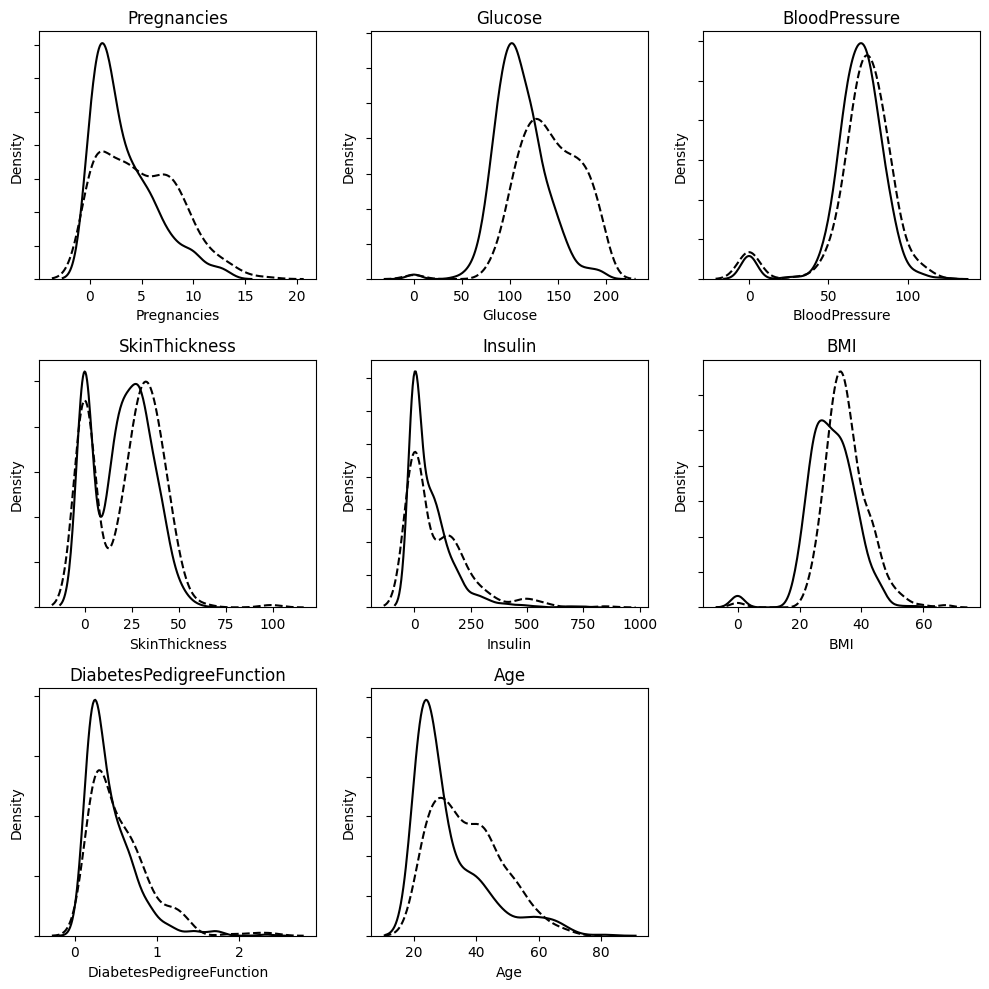

In [9]:
import seaborn as sns

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(10,10))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.kdeplot(df.loc[df.Outcome == 0][col], ax=ax,
    linestyle='-', color='black', label="No Diabetes",warn_singular=False)
    sns.kdeplot(df.loc[df.Outcome == 1][col],ax=ax,
    linestyle='--',
    color='black', label="Diabetes",warn_singular=False)
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)
plt.tight_layout()
plt.show()

**Explanation of code**

The purpose of the above code is to plot density plots for every variable in a pandas DataFrame (`df`) and compare the distribution of people who have diabetes against those who do not. The columns of the DataFrame represent different variables, and the column "Outcome" indicates whether a person has diabetes (1) or not (0).

1. `import seaborn as sns` - This line imports the seaborn library, a Python data visualization library based on matplotlib. "sns" is a commonly used short name for seaborn.

2. `plt.subplots(3,3,figsize=(15,15))` - This line creates 9 subplots (a 3x3 grid) in a figure, where each subplot will later be populated with density plots. The size for the figure that holds all subplots is set to be 15x15 (units are typically inches).

3. The next block of code does the following inside a loop for all columns of the DataFrame:
  * `ax = plt.subplot(3,3,idx+1)` - Select a subplot to draw the next plot. The subplot position is determined by the index of iteration (`idx+1`).
  
  * `ax.yaxis.set_ticklabels([])` - Clear the Y-axis labels as only the density curves are required for comparison. The exact values are not important in this scenario.
  
  * sns.kdeplot(...): This is called twice to plot two density plots on the same subplot:
  The first kdeplot uses data from non-diabetic patients (df.Outcome == 0) and plots a solid line.
  The second kdeplot uses data from diabetic patients (df.Outcome == 1) and plots a dashed line.
  
  warn_singular=False suppresses warnings about zero variance data.
  
  * `ax.set_title(col)` - This line sets the title of the subplot to the corresponding column name.
  
4. `plt.subplot(3,3,9).set_visible(False)`- This line hides the 9th subplot (bottom right) if there are only 8 plots.
  
5. `plt.show()` - Finally, this line is used to display the plotted figure



#**Discussion of outcome**

If we look at the plot for the **Glucose** variable, we can see that among the **non-diabetics (solid line)**, the curve has a normal distribution centered around the value 100. This tells us that among non-diabetics, most people have a blood glucose value of 100 mg/dL. On the other hand, if we look at the **Diabetics (dashed line)**, the curve is wider and is centered around a value of 150. This tells us that diabetics tend to have a wider range of blood glucose value, and the average blood glucose value is around 150 mg/dL. Therefore, there is a significant difference in blood glucose values for diabetes vs non-diabetics.
A similar analysis can also be made for the variable BMI and Age. In other words, the **Glucose, BMI, and Age variables are strong predictors for diabetes.** People with diabetes tend to have higher blood glucose level, higher BMI, and are older.

On the other hand, we can see that for variables such as BloodPressure and SkinThickness, there is no significant difference in the distribution between diabetics and non-diabetics. The two groups of people tend to have similar blood pressure and skin thickness values. **Therefore, BloodPressure and SkinThickness are poorer predictors for diabetes.**

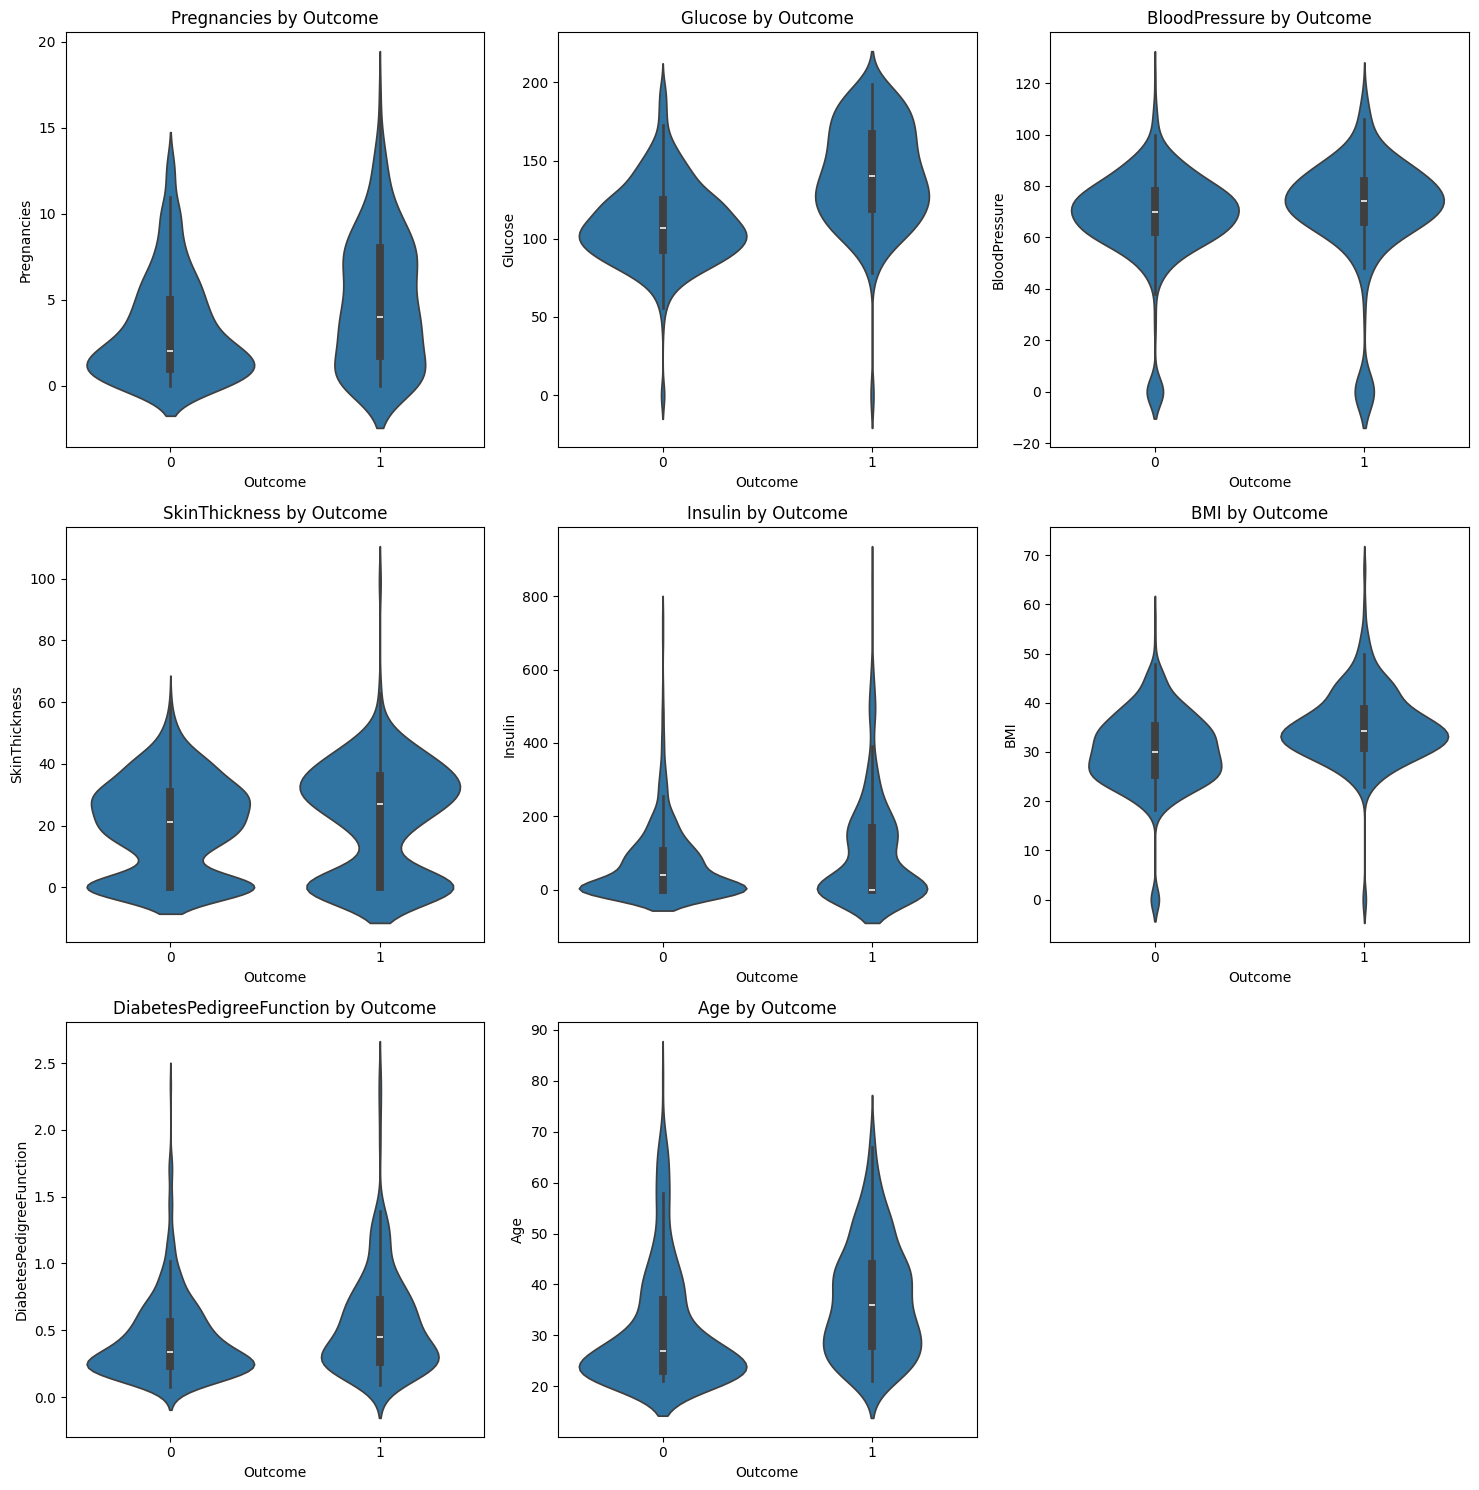

In [10]:
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes = axes.ravel()

for idx, col in enumerate(df.columns[:-1]):
    sns.violinplot(x='Outcome', y=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} by Outcome')

plt.tight_layout()
plt.subplot(3,3,9).set_visible(False)
plt.show()

**Explanation of code**


1. `fig, axes = plt.subplots(3, 3, figsize=(15, 15))`: Creates a figure (fig) and a 3x3 grid of axes (axes). figsize=(15, 15) sets the size of the figure.

2. `axes = axes.ravel()`: Flattens the 2D axes array into a 1D array. This makes it easier to iterate through the subplots.

3. `for idx, col in enumerate(df.columns[:-1])`:  Loops through each column in the DataFrame, except the last one ([:-1]), which is assumed to be 'Outcome'.
enumerate provides the index (idx) and column name (col) for each iteration.

4. `sns.violinplot(x='Outcome', y=col, data=df, ax=axes[idx])`:
Creates a violin plot for the current column (col) against the 'Outcome' variable.
ax=axes[idx] specifies the subplot where the violin plot should be drawn.

5. `axes[idx].set_title(f'{col} by Outcome')`:
Sets the title of the subplot to indicate the feature and the grouping variable ('Outcome').

7. `plt.tight_layout()`:
Adjusts the spacing between subplots to avoid overlap.

8. `plt.show()`:
Displays the figure with all the violin plots.

#**Discussion of outcome**

The violin plots generated provide insights into the distribution of various features in  dataset, categorized by the 'Outcome' variable.


**Width:** of the violin at a particular value indicates the density of data points at that value. Wider sections represent higher density, meaning more data points are concentrated around that value.

**Overall shape:**  of the violin provides a visual representation of the distribution. For example:
Symmetrical violins suggest a normal or approximately normal distribution.
Skewed violins indicate a skewed distribution .Multimodal violins (with multiple peaks) might suggest the presence of distinct subgroups within the data.


**Median:** The white dot inside the violin represents the median value of the data for that category.

**Interquartile range (IQR):** The black bar within the violin represents the IQR, which encompasses the middle 50% of the data.

**Whiskers:** The thin lines extending from the IQR show the range of the data, excluding outliers.

**Outliers:**
Individual points outside the whiskers are considered potential outliers.

---

Diabetic individuals have a higher median for **Glucose level and BMI** and a wider distribution, indicating higher variability. Also older individuals are more likely to develop diabetes, Since the plot has a higher median **age** and a more spread-out distribution.
Lastly diabetic individuals generally have higher insulin levels, and the distribution is more spread out. However, there's a noticeable overlap between the two outcome groups.


**Check for missing values**

In [11]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


The code `print(df.isnull().any())` is used to check for missing values (represented as NaN - Not a Number) in  DataFrame (df). It returns a DataFrame of the same shape where each cell is either True (if the original cell was NaN) or False (if the original cell had a value).**There are no missing values but as noticed above a lot of zeros indicating better searching.**

In [12]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


**explanation of code**

The `for col in df.columns:` loop navigates through each column in the DataFrame(df).

3. `missing_rows = df.loc[df[col]==0].shape[0]`: For each column, it applies a condition that checks if there are any rows with the value '0' using the `df[col]==0` condition. The `.loc` attribute is used to access a group of rows that meet the specified condition. The shape attribute (`.shape`) returns a tuple representing the dimensionality of the DataFrame. More specifically, `.shape[0]` will give the number of rows.

4. `print(col + ": " + str(missing_rows))`: After it gets the count of rows with 0 values for each column, it prints the column name along with the no.of rows.For example, if you have a DataFrame with two columns, `A` and `B`, and their values as :```A B0 1 01 0 22 3 03 4 4 ```Then, this code will print:```A: 1B: 2```

This indicates that column `A` has one row and column `B` has two rows, with the value '0'.

#**Discussion of outcome**

In the Insulin column, there are 374 rows with 0 values. That is almost half of the data that we have! Clearly, we cannot discard these rows with 0 values as that will cause a significant drop in model performance.

In [13]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

This code snippet replaces all occurrences of the value 0 with np.nan (which represents missing values in pandas) in the specified columns of  DataFrame df.

---
**Why replace 0 with NaN?**

It's likely that the value 0 was used as a placeholder for missing or invalid measurements for features like glucose, blood pressure, etc. Replacing these zeros with NaN allows to: Explicitly represent missing data and use appropriate imputation techniques.

In [14]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [15]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

#**Discussion of outcome**

This code snippet fills in the missing values (NaN) in the specified columns of your DataFrame df with the mean value of each respective column.

**Why fill with mean?**

Filling missing values with the mean is a common imputation technique. It's simple to implement and can be effective when the number of missing values is relatively small and the data is roughly normally distributed. However, it's important to be aware of its potential drawbacks:

* Can distort the distribution: Filling with the mean can artificially reduce the variance of the data.
* May not be appropriate for all data types: For categorical or skewed data, other imputation methods might be more suitable.

In [16]:
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [17]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

Since the object returned by the preprocessing.scale() function is no longer a pandas DataFrame, it is a time to convert it back:

In [18]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [19]:
df_scaled['Outcome'] = df['Outcome']
df =df_scaled

In [38]:
import pandas as pd

# Assuming 'data' is your dataset
if isinstance(df, pd.DataFrame):
    print("The dataset is a pandas DataFrame.")
else:
    print("The dataset is not a pandas DataFrame.")


The dataset is a pandas DataFrame.


Lastly, there is no need  to scale the Outcome column (which is the target variable that will be predicted). It is obvious when comparing the 5 first rows of the dataset before and now that the data have the corresponding standardized values.

In [20]:
print(df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1  
3 -0.634212                 -0.920763 -1.041549        0  
4  1.548980                  5.484909 -0.020496        1  


Let's take a look at the mean, standard deviation and the max of each of the transformed variables:

In [21]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


**explanation of code**

The `describe()` is a method provided by pandas library that generates descriptive statistics of a dataframe `df`. These include central tendency, dispersion, and distribution of your dataset's numerical columns. The statistics it provides by default are: count, mean, standard deviation (std), minimum value, 25th percentile, 50th percentile (median), 75th percentile, and maximum value.

2. `.loc[['mean', 'std','max'],]`: The `loc` function is used to access a group of rows and columns by labels or a boolean array. Here, it is being used to select only the rows labeled as 'mean', 'std',and 'max' from the output of `df.describe()`.

3. `.round(2)`: The `round()` function is used to round off the decimal numbers to a number of decimal places. Here, it is rounding off the values to two decimal places.

4. `.abs()`: The `abs()` function is used to get the absolute value of each element in the data frame. If there was any negative value, it will change to a positive value.

The scale of each variable is now a lot closer to one another.

# Train-Validate-Test

---
*   **Training set:** The neural network will be trained on this subset of the data.

*   **Validation set:** This set of data allows us to perform hyperparameter tuning (that is, tuning the number of hidden layers) using an unbiased source of data.
*   **Testing set:** The final evaluation of the neural network will be based on this subset of the data.





The purpose of splitting the data into training, testing, and validation sets is to avoid **overfitting** and to provide an unbiased source of data for evaluating model performance. Typically, we will use the training and validation set to tune and improve our model. The validation set can be used for early stopping of training, that is, we continue to train our neural network only to the point where model performance on the validation set stops improving. This allows us to avoid overfitting the neural network.

The testing set is also known as the holdout dataset, as the neural network will never be trained using it. Instead, we will use the testing set to evaluate the model at the end. This provides us with an accurate reflection of the real-world performance of our model.

How do we decide the proportion of each split? The competing concerns, in this case, is that if we allocate most of the data for training purposes, model performance will increase at the detriment of our ability to avoid overfitting. Similarly, if we allocate most of the data for validation and testing purposes, model performance will decrease as there might be insufficient data for training.

In [22]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

**explanation of code**

`X = df.loc[:, df.columns != 'Outcome']`This line is defining `X` as the set of all features. `df` refers to a pandas DataFrame. The `df.loc` function is used to access a group of rows and columns by label(s) or a boolean array in the DataFrame.

Here, `df.columns != 'Outcome'` returns a boolean array that is `True` for every column that is not 'Outcome'. Therefore, `df.loc[:, df.columns != 'Outcome']` selects all columns except 'Outcome', where `:` means all rows and `df.columns != 'Outcome'` means column 'Outcome' is not included.`y = df.loc[:, 'Outcome']`Similarly, this line is defining `y` as the target variable. Here, `df.loc[:, 'Outcome']` is used to select all rows of the 'Outcome' column.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

**explanation of code**

 train_test_split function is used to split available dataset into training set and test set. Here, `X` and `y` are input data arrays. **`X` is typically a 2D array containing your features data (input data), and `y` is a 1D array containing your target (what you wish to predict) data.**

 `X_train` and `y_train` form the 'training dataset' on which the model will be trained

 `X_test` and `y_test` form the 'testing dataset' that will be used to evaluate the trained model.

 `test_size=0.2` denotes that 20% of the data will be used for testing and 80% of the data will be used for training

Then further splits the training set obtained from the first split into a new training set and a validation set.
Input: It takes the training data (X_train, y_train) from the first split.
Output:
X_train, y_train: A smaller portion (around 64% of the original data) used for training.
X_val, y_val: A portion of the training data (around 16% of the original data) used for validation during training (e.g., for hyperparameter tuning or early stopping).

In [25]:
print(df['Outcome'].value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


**Think about using stratify**

The above line of code calculates the proportion of each unique value in the Outcome column of the DataFrame df. The output shows that approximately 65% of the data belongs to class 0 (no diabetes) and 35% to class 1 (diabetes). This is an imbalanced dataset.

Using stratify in train_test_split ensures that both the training and testing sets have the same proportion of classes as the original dataset. The neural network will be used first without stratify and based on its preformance it will beutilized otherwise.

In [26]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Sequential
model = Sequential()

importing the `Sequential` model class from the `keras.models` module.`model = Sequential()` - This line is creating an instance of the `Sequential` model. This instance, stored in the variable `model`, is what you will add layers to and ultimately use to train and make predictions with your deep learning model

---

#**Sequential model**

In machine learning, a **sequential model** typically refers to a type of neural network architecture known as a Sequential model. The Sequential model is a linear stack of layers, where **each layer in the model has exactly one input tensor and one output tensor.** This architecture is popular for building deep learning models using frameworks such as **Keras.**

Here are the key characteristics of a Sequential model:

* Linear Stack: Layers in a Sequential model are arranged sequentially, one after the other. The output of each layer serves as the input to the next layer, forming a linear stack of layers.

* Single Input, Single Output: Each layer in the Sequential model has a single input tensor and a single output tensor. The input tensor represents the data fed into the model, while the output tensor represents the output of the layer's computation.

* Layer Types: The layers in a Sequential model can be of various types, including:

 * Dense layers (fully connected layers)
 * Convolutional layers (for processing spatial data, such as images)
 * Recurrent layers (for processing sequential data, such as text or time series)
 * Dropout layers (for regularization and preventing overfitting)
 * Pooling layers (for reducing spatial dimensions)

* Flexible Architecture: While the Sequential model is a simple and straightforward architecture, it can be used to build a wide range of neural network architectures, including feedforward networks, convolutional neural networks (CNNs), recurrent neural networks (RNNs), and combinations of these architectures.

* Easy to Use: The Sequential model is easy to use and is suitable for beginners and practitioners alike. It abstracts away much of the complexity of building neural networks, making it accessible for rapid prototyping and experimentation.
---

In [27]:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**explanation of code**

**Dense layers** are the most common and basic type of layers in neural networks. **They are fully connected layers, and each neuron in them receives input from all neurons of the previous layer.**

-  `model.add(Dense(32, activation='relu', input_dim=8))` adds a dense layer into the model. Here are specific details regarding the parameters: - the first parameter `32` specifies the number of neurons (also called nodes) in this layer. In this dense layer, there is going to be 32 nodes.


- `activation='relu'` sets the activation function for the neurons in this layer to ReLU (Rectified Linear Unit). The activation function decides whether a neuron should be activated or not by calculating weighted sum and further adding bias. ReLU is a popular activation function in deep learning models.

- `input_dim=X_train.shape[1]` The input_dim parameter in the first layer of a neural network specifies the number of input features the model should expect. Here it dynamically retrieves the number of features (columns) in the training data.
So, X_train.shape[1] ensures that the number of input features matches the actual number of features in dataset.



**In summary, the above code is adding a fully connected layer with 32 neurons to a neural network model, using the ReLU activation function and expecting 8 input features.**

In [28]:
# Add the second hidden layer
model.add(Dense(16, activation='relu'))

In [29]:
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

 'sigmoid' is the activation function used in the output layer. The sigmoid function restricts the output between 0 and 1, which works perfectly in this case as the **output is a probability.**

In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**explanation of code**

- `model.compile()`: This is a function in Keras API used to configure the model for training. It takes three main arguments - optimizer, loss and metrics.

- `optimizer='adam'`: This is to specify the optimizer to be used during the training of the neural networks. 'Adam' is one of the most commonly used optimizers as it is efficient in terms of computational cost and is good at handling sparse gradients on noisy problems. It is known to be the best choice in most cases.

- `loss='binary_crossentropy'`: This argument is used to define the loss function. As we are dealing with a binary classification problem, we use 'binary_crossentropy'. The goal of our training is to minimize this loss function.

- `metrics=['accuracy']`: While the model is being trained it calculates the listed metrics functions and uses them to evaluate the model's performance. In this case, it will compute the 'accuracy', which is one of the most common evaluation metrics in classification problems. It's the ratio of the number of correct predictions to the total number of input samples.

In [31]:
# Train the model for 201 epochs
history=model.fit(X_train, y_train, epochs=201,validation_data=(X_val, y_val))

Epoch 1/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6290 - loss: 0.7206 - val_accuracy: 0.6829 - val_loss: 0.6667
Epoch 2/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6074 - loss: 0.6887 - val_accuracy: 0.6829 - val_loss: 0.6393
Epoch 3/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6411 - loss: 0.6390 - val_accuracy: 0.6667 - val_loss: 0.6121
Epoch 4/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6725 - loss: 0.6077 - val_accuracy: 0.6585 - val_loss: 0.5886
Epoch 5/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6952 - loss: 0.5704 - val_accuracy: 0.6667 - val_loss: 0.5667
Epoch 6/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7314 - loss: 0.5289 - val_accuracy: 0.7073 - val_loss: 0.5480
Epoch 7/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.5054 - val_accuracy: 0.6911 - val_loss: 0.5345
Epoch 8/201
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7614 - loss: 0.4927 - val_accuracy: 0.6911 - 

**explanation of code**

This line of code trains your Keras model (model) using the training data (X_train, y_train) and also evaluates the model's performance on a separate validation set (X_val, y_val) during training.

- `history = ...:` This assigns the output of model.fit to a variable named history. The history object will contain information about the training process, including metrics and loss values for both the training and validation sets at each epoch.

- `model.fit(...):` This is the core function in Keras for training a model. It takes the following arguments:

- `epochs=201:` The number of epochs to train the model for. One epoch means that the model has seen the entire training dataset once.
- `validation_data=(X_val, y_val):` This specifies the validation data to be used during training. The model's performance will be evaluated on this data at the end of each epoch, and the results will be stored in the history object.

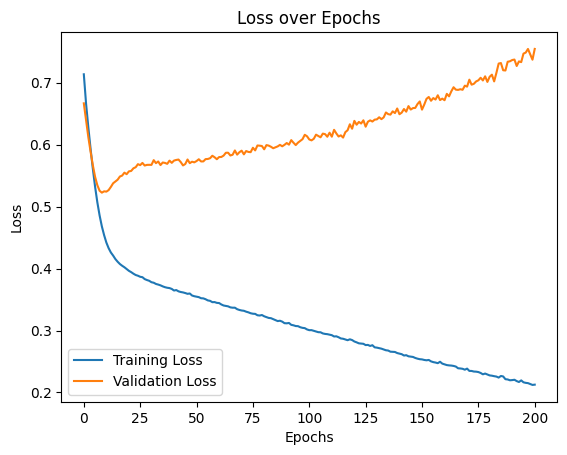

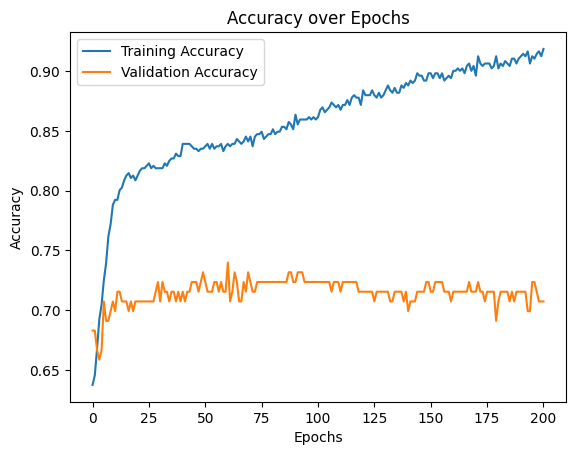

In [32]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**explanation of code**

Loss Plot-Accuracy Plot

- `plt.plot(history.history['loss'], label='Training Loss'):` Plots the training loss values over epochs.
- `history.history['loss']` retrieves the training loss values stored in the history object (which obtained from model.fit).
- `plt.plot(history.history['val_loss'], label='Validation Loss'):` Plots the validation loss values over epochs.
- `plt.title('Loss over Epochs'):` Sets the title of the plot.
- `plt.xlabel('Epochs'):` Labels the x-axis.
- `plt.ylabel('Loss'):` Labels the y-axis.
- `plt.legend():` Displays a legend to identify the training and validation loss curves.
- `plt.show():` Shows the plot.

The same is for the second plot


In [33]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9209 - loss: 0.2358 
Training Accuracy: 92.26%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.7029 
Testing Accuracy: 72.08%



**explanation of code**

scores = model.evaluate(X_train, y_train)`: It evaluates the performance of the trained model on the training set (`X_train` and `y_train`). The `evaluate` method returns the loss value and metrics values for the model in 'test mode'. In this case, it's likely that the metric we're interested in is accuracy, given the contents of the next line.

2. `print("Training Accuracy: %.2f%%\n" % (scores[1]*100))`: It prints the training accuracy of the model. Given that `evaluate` returns loss as the first element of its output and metrics (in this case, accuracy) as the rest, `scores[1]` is likely the accuracy of the model. Multiplying it by 100 converts the accuracy from a proportion (e.g., 0.85) to a percentage (e.g., 85%). The `%.2f%%` bit is used to format the number to 2 decimal places.


The same for X_test and y_test

#**Discussion of outcome**

First the model is trained using 50 epochs. The accuracy is almost 70% a number not very satisfying.Then after using 201 epochs it is obvious from the above that the loss decreases and the accuracy increases over each epoch, as the learning algorithm continuously updates the weights and biases in the MLP according to the training data. Note that the accuracy refers to the accuracy based on the training data.



**The model might be overfitting, because:**

1.  High training accuracy almost 92% training accuracy is very high, suggesting the model might have memorized the training data.
2.  Significant difference between training and testing accuracy: The testing accuracy almost 77% is considerably lower than the training accuracy, which is a strong indicator of overfitting. The model is not generalizing well to unseen data.

3. Moreover The plots show the training-validation loss and accuracy over the 201 epochs. Blue Line refers to training and orange in validation

 The training loss decreases steadily over the epochs and training accuracy increases steadily reaching about 90% by the end of training. This indicates that the model is successfully learning the patterns in the training data and continuously improving its fit throughout the epochs.

 On the other hand  validation loss decreases initially but then starts increasing after about 25-30 epochs, indicating that the model's performance on the validation data starts to worsen as training continues. Validation Accuracy as well plateaus around 70% after the first 20–30 epochs and remains relatively constant with slight fluctuations. Unlike training accuracy, the validation accuracy does not improve as the model continues to train, showing a clear divergence between the training and validation performance.



So the fact that the model is oerfitting is also enhanced by the above plots since there is great difference in how the train and validation metrics evolve. Not using stratify could contribute to the overfitting, especially if the dataset is imbalanced, as it is in this case.

In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


**explanation of code**

y_test_pred_probs = model.predict(X_test)`: This line uses the `predict` method from a pre-defined model to predict the output (`y_test_pred_probs`) given a set of test inputs (`X_test`). The predicted output is in the form of probabilities that then can be used to plot ROC curve. Model is previously defined and can be any sort of classifier model like `RandomForestClassifier`, `LogisticRegression`, etc. And the `X_test` is the test data for the trained model to predict the outcome.

`from sklearn.metrics import roc_curve`: This line imports the function `roc_curve` from the module `sklearn.metrics`. The `roc_curve` is a function used to compute the Receiver Operating Characteristic (ROC), a tool for understanding the quality of binary classifiers

In [35]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

**explanation of code**

1. FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs) Here, roc_curve is a function that computes the ROC curve points.

2. The input to this function, (y_test, y_test_pred_probs), are the true binary labels and the target scores, which can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions.

3. FPR is the increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

4. TPR is same as FPR, except it computes the true positive rates.


5. The _ is a common convention in Python for throwaway variables and, in this case, it contains the thresholds values for the computed ROC. It is ignored because it may not be needed for further calculations or analysis.

Text(0, 0.5, 'True Positive Rate')

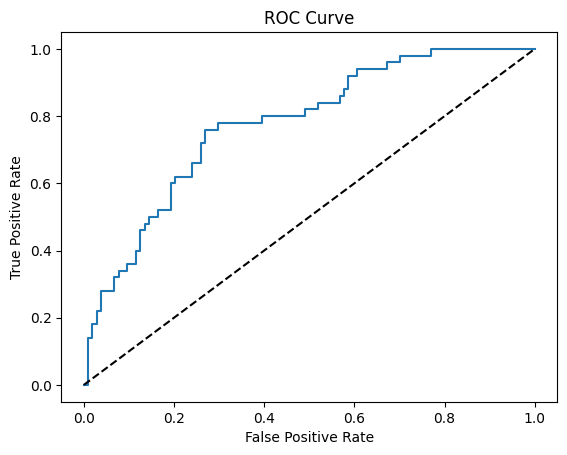

In [36]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**explanation of code**

1. `plt.plot(FPR, TPR)`: This plots the ROC curve based on the TPR and FPR arrays. It shows the tradeoff between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity). Each point on the curve represents a different threshold level used in a binary classifier.

2. `plt.plot([0,1],[0,1],'--', color='black')`: This line plots a diagonal dashed line from the bottom left to the top right of the graph. This is the line of no discrimination (random guessing), to which the ROC curve is compared. A good classifier will have a ROC curve significantly above this line: reaching towards the top left of the plot.

3. `plt.title('ROC Curve')`: Sets the title of the plot as 'ROC Curve'.

4. `plt.xlabel('False Positive Rate')`: Labels the X-axis as 'False Positive Rate'.5. `plt.ylabel('True Positive Rate')`: Labels the Y-axis as 'True Positive Rate'.

In [37]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_test_pred_probs)
print("AUC:", auc)

AUC: 0.7765384615384615


#**Conclusion**

The model performs rather well, close to the model ROC Curve. This shows that model is able to differentiate samples of different classes, making good predictions. Moreover an AUC of 0.82 suggests that it's performing significantly better than random guessing.
Yet it shouldn' be forgotten that this is probably happening because the model is overfitting.  While the training performance is very good, the model's generalization on validation and test data is poor.

Implementing early stopping, trying regularization methods or considering reducing model complexity, while using stratify in the splitting of datasets would benefit the accuracy of the model, or using more neurons and epochs.